# <center> Визуализация на Python

# <center>Часть 1. Matplotlib


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

# Содержание
* [Matplotlib](*1)
* [Seaborn](*2)

In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

Для начала построим примитивную линейную диаграмму при помощи функции `plot`

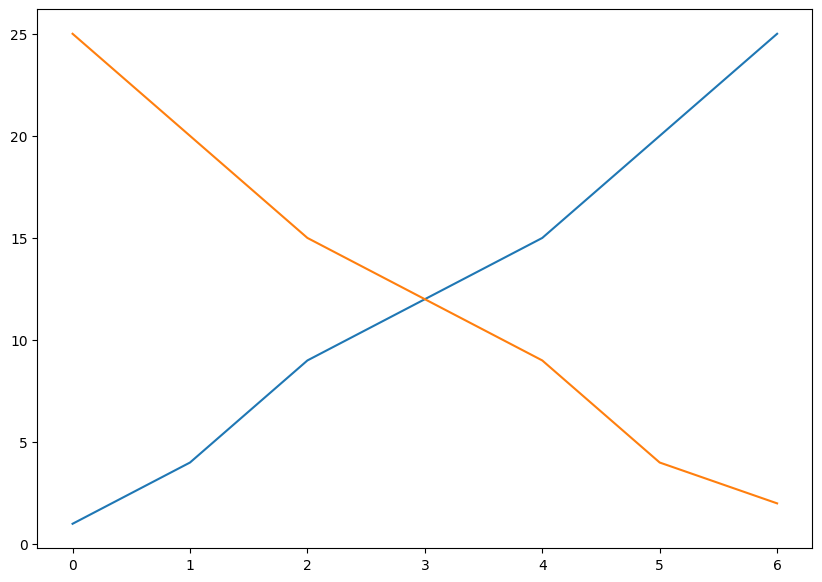

In [2]:
plt.plot([1, 4, 9, 12, 15, 20, 25])
plt.plot([25, 20, 15, 12, 9, 4, 2])

Потренируемся строить графики с библиотекой `matplotlib` на основе данных [об именах новорожденных в США](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data). Построим **столбчатую диаграмму распределения 15 самых популярных женских имен в 2017 году**.

In [3]:
names = pd.read_csv(
    '../.datasets/16./names/yob2017.txt',
    names=['Name', 'Gender', 'Count'])
# names
names_barh = names[names['Gender']=='F'].sort_values('Count', ascending=False).head(15)
names_barh

,Name,Gender,Count
0,Emma,F,19738
1,Olivia,F,18632
2,Ava,F,15902
3,Isabella,F,15100
4,Sophia,F,14831
5,Mia,F,13437
6,Charlotte,F,12893
7,Amelia,F,11800
8,Evelyn,F,10675
9,Abigail,F,10551


<BarContainer object of 15 artists>

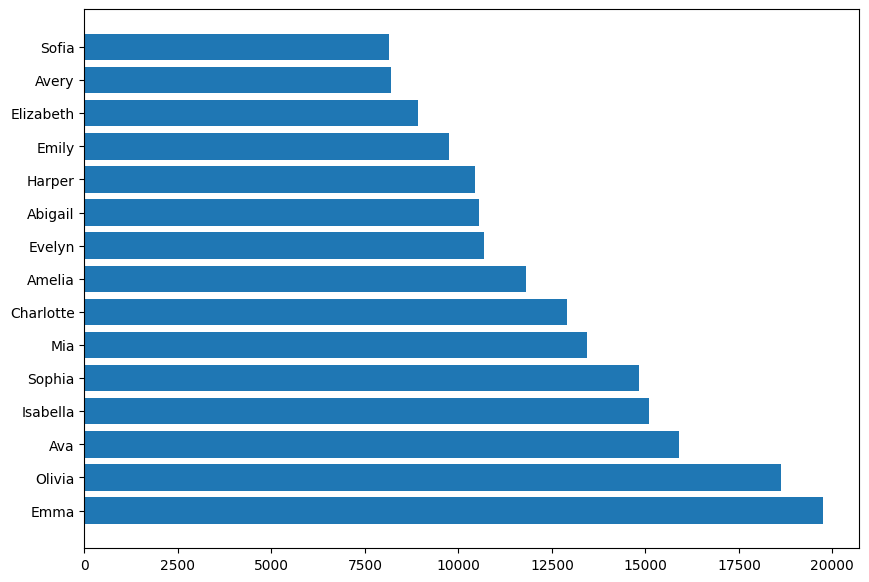

In [4]:
plt.barh(names_barh['Name'], names_barh['Count'])
# plt.savefig('my_diag_2.png')

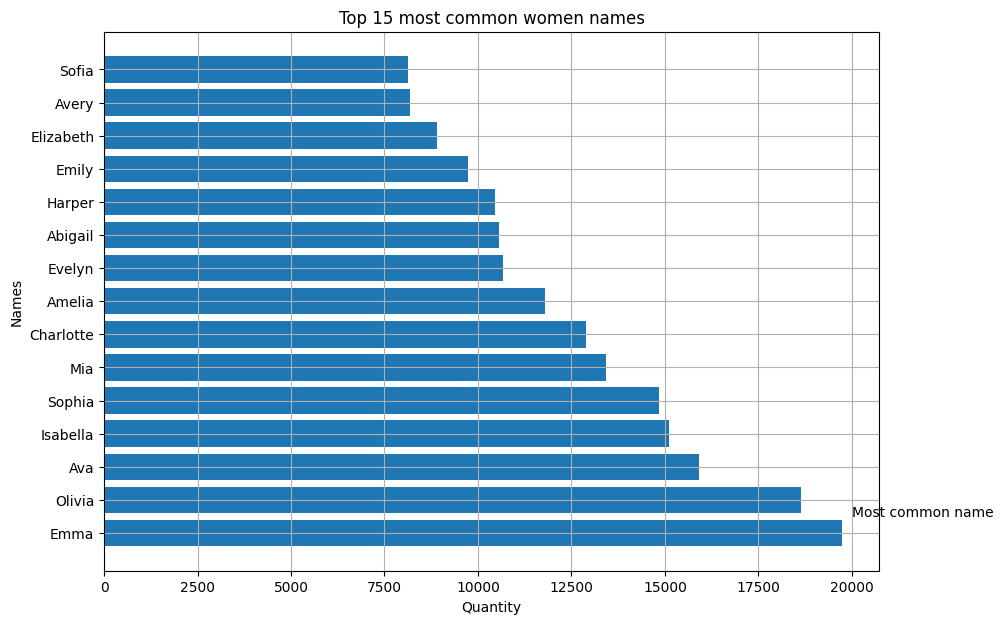

In [5]:
plt.barh(names_barh['Name'], names_barh['Count'])
plt.xlabel('Quantity')
plt.ylabel('Names')
plt.title('Top 15 most common women names')
plt.text(20000, 0.5, 'Most common name')
plt.grid()

Построим **линейчатый график распределения количетсва имен в разрезе пола (количества рожденных мальчиков и девочек) c 1880 по 2017 год**

In [7]:
# Делаем ДФ из всех файлов
names_by_year = {}
for year in range(1880, 2018):
    names_by_year[year] = pd.read_csv(
        f'../.datasets/16./names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year)
#names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

Name Gender  Count
1880 0           Mary      F   7065
     1           Anna      F   2604
     2           Emma      F   2003
     3      Elizabeth      F   1939
     4         Minnie      F   1746
...               ...    ...    ...
2017 32464      Zykai      M      5
     32465     Zykeem      M      5
     32466      Zylin      M      5
     32467      Zylis      M      5
     32468      Zyrie      M      5

[1924665 rows x 3 columns]

In [8]:
# Делаем ДФ из всех файлов
names_by_year = {}
for year in range(1880, 2018):
    names_by_year[year] = pd.read_csv(
        f'../.datasets/16./names/yob{year}.txt',
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year)
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all

,Name,Gender,Count
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
...,...,...,...
2017,Zykai,M,5
2017,Zykeem,M,5
2017,Zylin,M,5
2017,Zylis,M,5


В библиотеку `pandas` встроен wrapper для `matplotlib`.
Начнем с самого простого и зачастую удобного способа визуализировать данные из `pandas dataframe` — это воспользоваться методом `plot.`

In [14]:
names_all.index

Int64Index([1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', length=1924665)

# Агрегируем количество имен по годам и по полу

In [11]:
gender_dynamics = names_all.groupby([names_all.index, 'Gender']).sum(numeric_only=True)
gender_dynamics 

Count
     Gender         
1880 F         90993
     M        110491
1881 F         91953
     M        100743
1882 F        107847
...              ...
2015 M       1909804
2016 F       1763916
     M       1889052
2017 F       1711811
     M       1834490

[276 rows x 1 columns]

In [12]:
gender_dynamics.unstack('Gender')

Count         
Gender        F        M
1880      90993   110491
1881      91953   100743
1882     107847   113686
1883     112319   104627
1884     129020   114442
...         ...      ...
2013    1750321  1886989
2014    1781072  1915239
2015    1778883  1909804
2016    1763916  1889052
2017    1711811  1834490

[138 rows x 2 columns]

In [13]:
gender_dynamics.unstack('Gender').columns

MultiIndex([('Count', 'F'),
            ('Count', 'M')],
           names=[None, 'Gender'])

In [14]:
gender_dynamics.unstack('Gender')['Count'].columns

Index(['F', 'M'], dtype='object', name='Gender')

In [15]:
gender_dynamics.unstack('Gender').drop(columns= 'Count')

1880
1881
1882
1883
1884
...
2013
2014
2015
2016
2017


<Axes: >

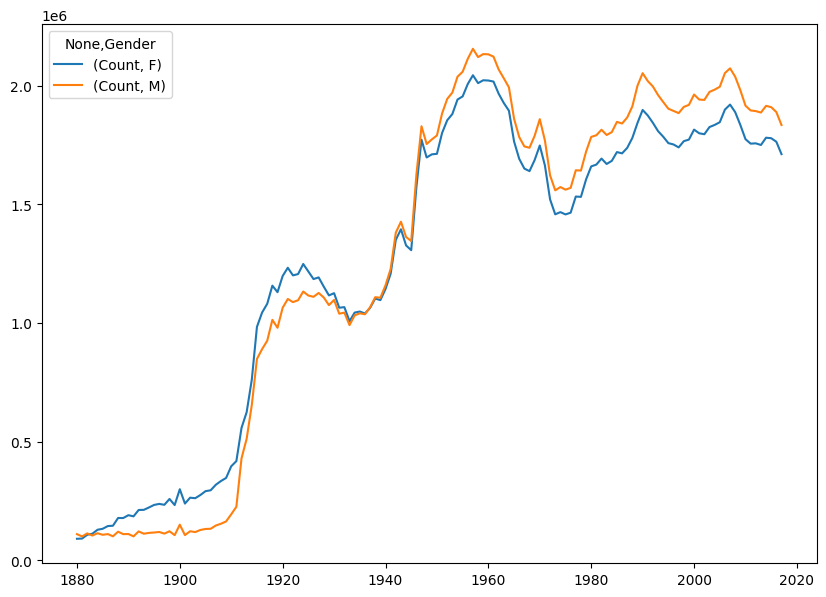

In [16]:
gender_dynamics.unstack('Gender').plot()

Построим **столбчатую диаграмму сравнение количества имен мальчиков и девочек в 1880 и 2017 годах**.

In [17]:
gender_dynamics = names_all.groupby([names_all.index, 'Gender']).sum(numeric_only=True)
gender_dynamics = gender_dynamics.loc[(gender_dynamics.index.get_level_values(0).isin([1880, 2017]))]
gender_dynamics

Count
     Gender         
1880 F         90993
     M        110491
2017 F       1711811
     M       1834490

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. 

<Axes: >

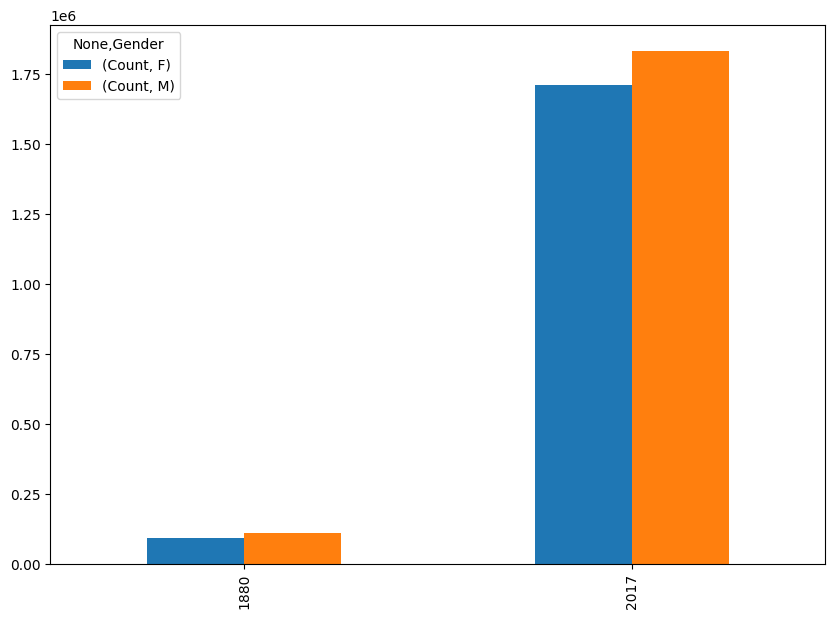

In [18]:
gender_dynamics.unstack().plot(kind='bar')

In [19]:
names_all.groupby(['Name']).sum(numeric_only=True)

,Count
Name,
Aaban,107
Aabha,35
Aabid,10
Aabir,5
Aabriella,32
...,...
Zyvion,5
Zyvon,7
Zyyanna,6


In [20]:
names_all.groupby(['Name']).sum(numeric_only=True).sort_values(by='Count', ascending=False)

,Count
Name,
James,5173828
John,5137142
Robert,4834915
Michael,4372536
Mary,4138360
...,...
Maider,5
Maide,5
Maichail,5


Построим **круговую диаграмму сравнения количества топ-5 имен по всем годам**

<Axes: ylabel='Count'>

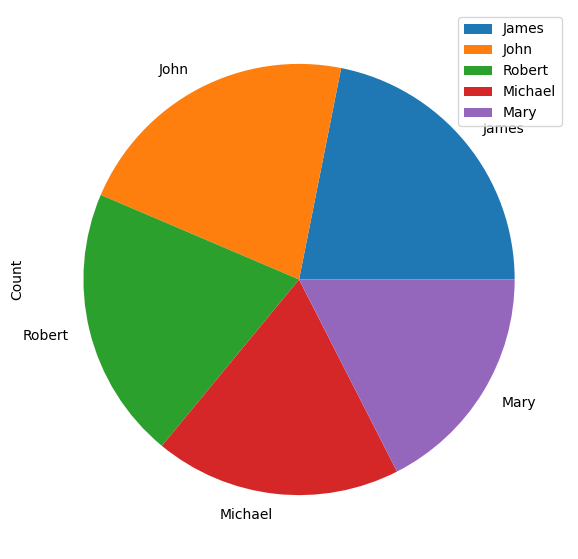

In [21]:
name_dynamics = names_all.groupby(['Name']).sum(numeric_only=True).sort_values(by='Count', ascending=False).head(5)
# name_dynamics
name_dynamics.plot(kind='pie', y='Count')

Построим `boxplot` распределения длин имен в 2017 году. 

In [22]:
names = pd.read_csv(
    '../.datasets/16./names/yob2017.txt', 
    names=['Name','Gender','Count']
)
names['Length'] = names['Name'].map(len)
names

,Name,Gender,Count,Length
0,Emma,F,19738,4
1,Olivia,F,18632,6
2,Ava,F,15902,3
3,Isabella,F,15100,8
4,Sophia,F,14831,6
...,...,...,...,...
32464,Zykai,M,5,5
32465,Zykeem,M,5,6
32466,Zylin,M,5,5
32467,Zylis,M,5,5


<Axes: >

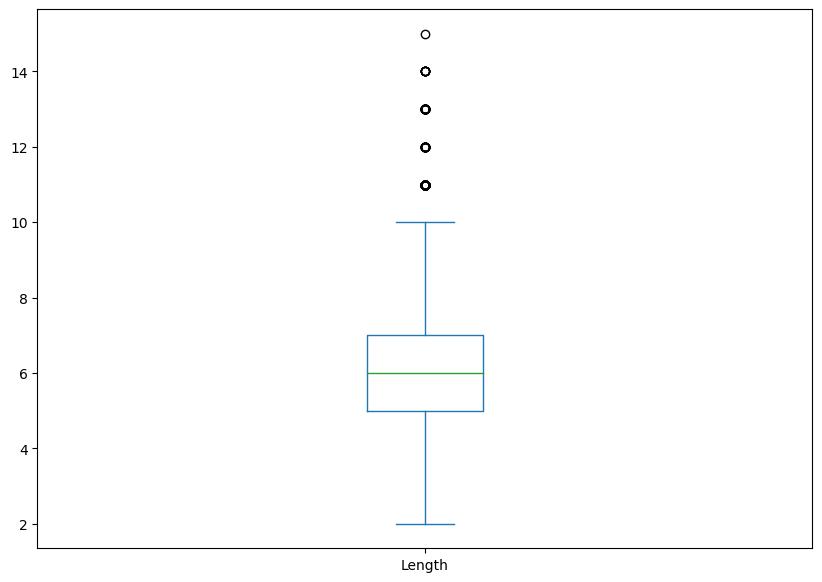

In [23]:
names['Length'].plot(kind='box')

`Box plot` состоит из коробки (поэтому он и называется `box plot`), усиков и точек. Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (`Q1`) и 75% (`Q3`) процентили. Черта внутри коробки обозначает медиану распределения. 
С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, где `IQR = Q3 - Q1` - интерквантильный размах. Точками на графике обозначаются выбросы (`outliers`) - те значения, которые не вписываются в промежуток значений, заданный усами графика

Поработаем с данными о продажах и оценках видео-игр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Данные об оценках игр есть не для всех строк, поэтому сразу оставим только те записи, по которым есть полные данные.

In [24]:
df = pd.read_csv('../.datasets/16./video_games_sales.csv')
print(df.shape)

(16719, 16)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [26]:
df = df.dropna()
print(df.shape)

(6825, 16)


Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства оставим только те признаки, которые мы будем в дальнейшем использовать.

In [27]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [28]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Построим **график продаж видео игр в различных странах в зависимости от года**. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам.

In [29]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [30]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


<Axes: xlabel='Year_of_Release'>

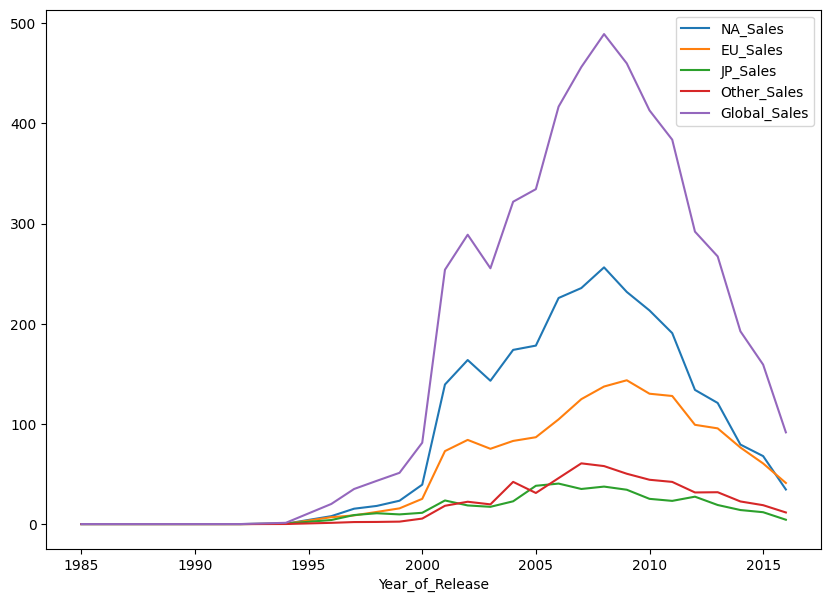

In [31]:
df1.plot()

<Axes: xlabel='Year_of_Release'>

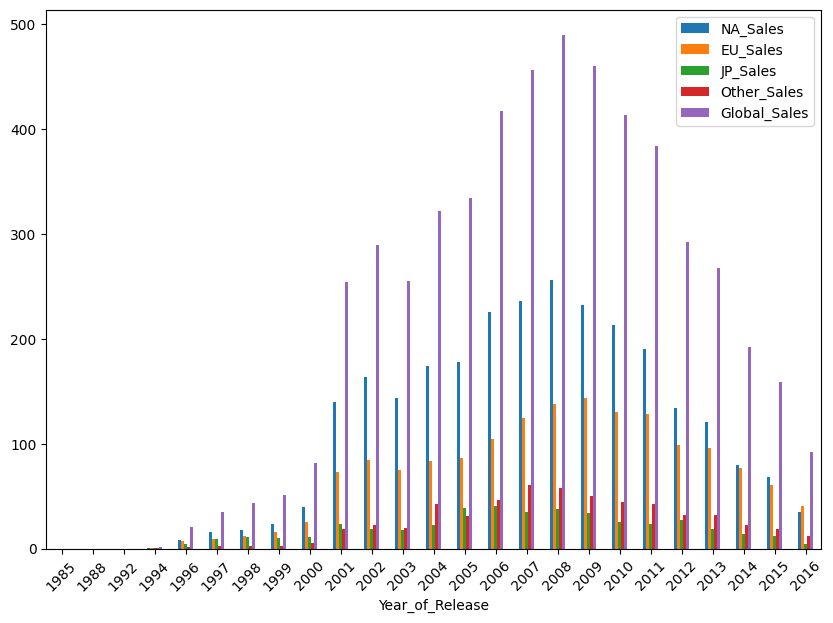

In [32]:
# Параметр rot отвечает за угол наклона подписей к оси x.
df1.plot(kind='bar', rot=45)

Или можем сделать stacked bar chart, чтобы показать и динамику продаж и их разбиение по рынкам.

<Axes: xlabel='Year_of_Release'>

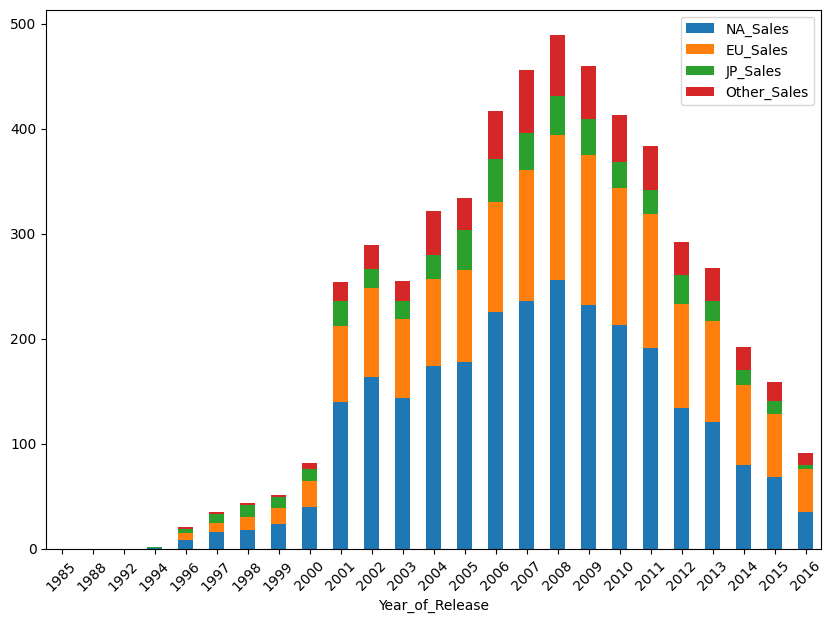

In [33]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='bar', rot=45, stacked=True)

<AxesSubplot: xlabel='Year_of_Release'>

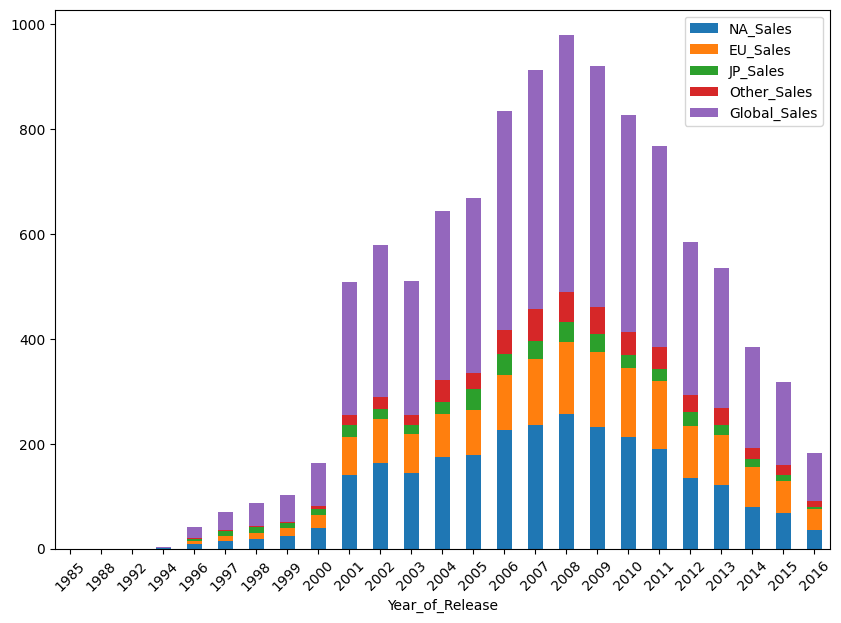

In [67]:
# неверно
df1.plot(kind='bar', rot=45, stacked=True)

<Axes: xlabel='Year_of_Release'>

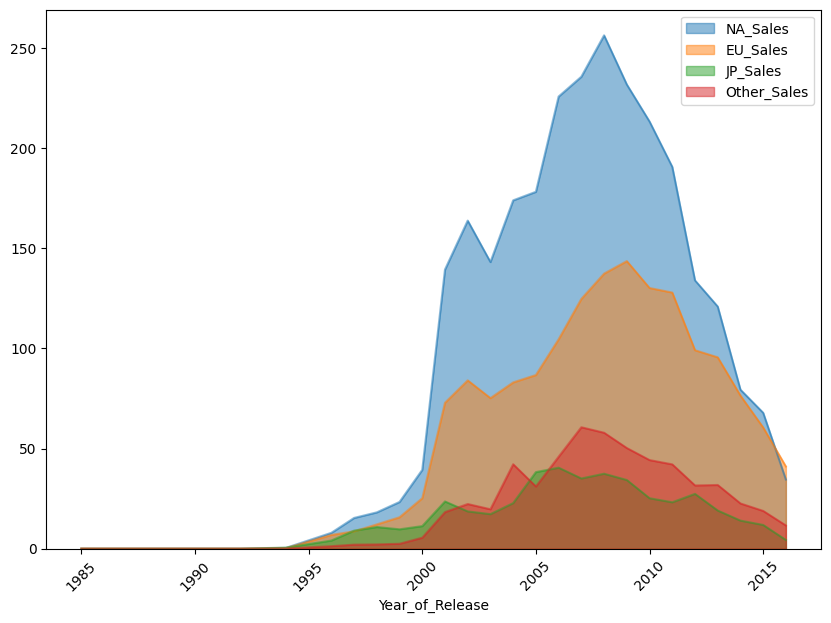

In [34]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=False)

Еще один часто встречающийся тип графиков - это гистограммы. Посмотрим на **распределение оценок критиков**.

<Axes: >

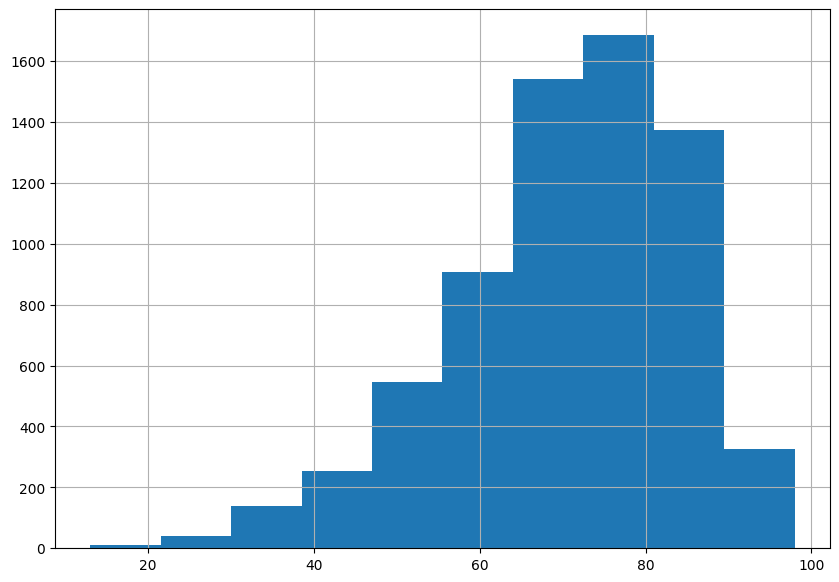

In [35]:
df.Critic_Score.hist()

In [38]:
df.Critic_Score.median()

72.0

Text(0, 0.5, 'games')

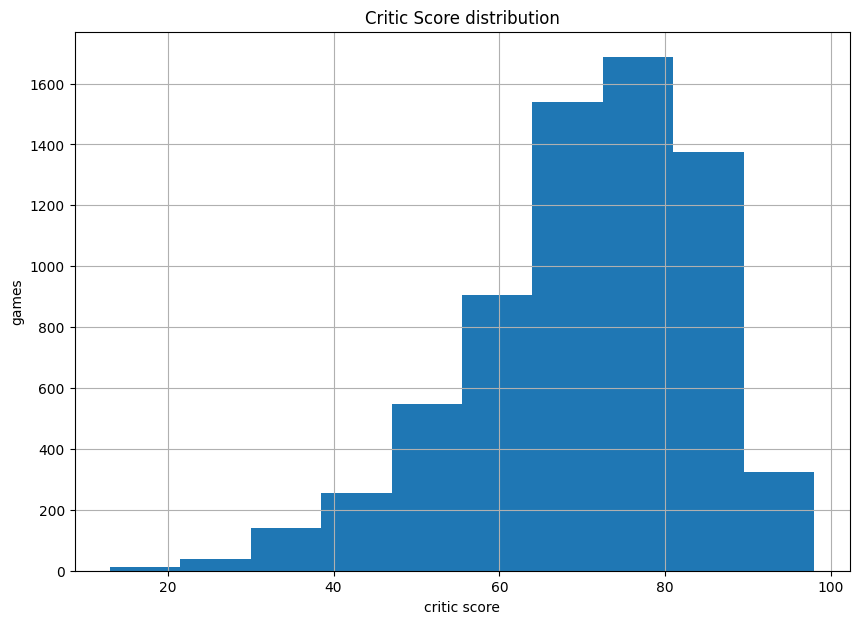

In [70]:
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

У гистограмм можно контролировать, на сколько групп мы разбиваем распределение с помощью параметра `bins`.

Text(0, 0.5, 'games')

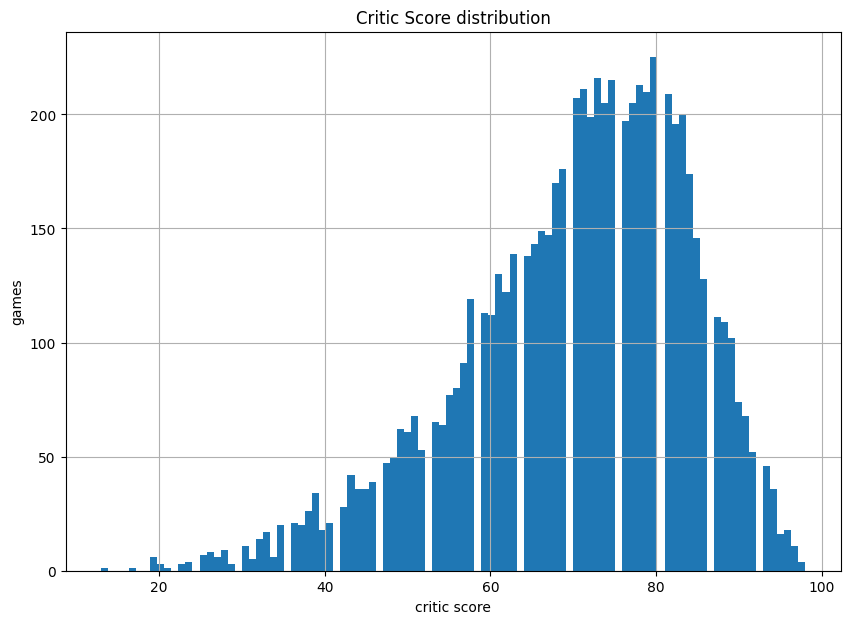

In [74]:
ax = df.Critic_Score.hist(bins=100)
ax.set_title('Critic Score distribution')
ax.set_xlabel('critic score')
ax.set_ylabel('games')

Познакомимся с тем, как в pandas можно стилизовать таблицы.

In [86]:
df.groupby('Developer')[['Global_Sales']].sum()#.sort_values('Global_Sales', ascending=False)

,Global_Sales
Developer,
"10tacle Studios, Fusionsphere Systems",0.11
"1C, 1C Company",0.03
"1C, Ino-Co, 1C Company",0.02
1C: Maddox Games,0.09
1C:Ino-Co,0.02
...,...
n-Space,5.44
neo Software,1.22
odenis studio,0.09


In [39]:
top_developers_df = df.groupby('Developer')[['Global_Sales']].sum()\
    .sort_values('Global_Sales', ascending=False).head(10)
    
top_developers_df

,Global_Sales
Developer,
Nintendo,529.90
EA Sports,145.93
EA Canada,131.46
Rockstar North,119.47
Capcom,114.52
Treyarch,101.37
Ubisoft Montreal,101.24
Ubisoft,94.53
EA Tiburon,79.77


In [40]:
top_developers_df.style.bar()

,Global_Sales
Developer,
Nintendo,529.900000
EA Sports,145.930000
EA Canada,131.460000
Rockstar North,119.470000
Capcom,114.520000
Treyarch,101.370000
Ubisoft Montreal,101.240000
Ubisoft,94.530000
EA Tiburon,79.770000


### Полезные ссылки
 * [Документация pandas.plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
 * [Документация pandas.style](http://pandas.pydata.org/pandas-docs/stable/style.html)
 * [Документация matplotlib](https://matplotlib.org/)

# <center>Часть 2. Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков **pair plot (scatter plot matrix)**. Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки. 

In [88]:
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.5 MB/s eta 0:00:000:00:010:00:01:01
  Using cached numpy-1.24.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0


In [24]:
import seaborn as sns

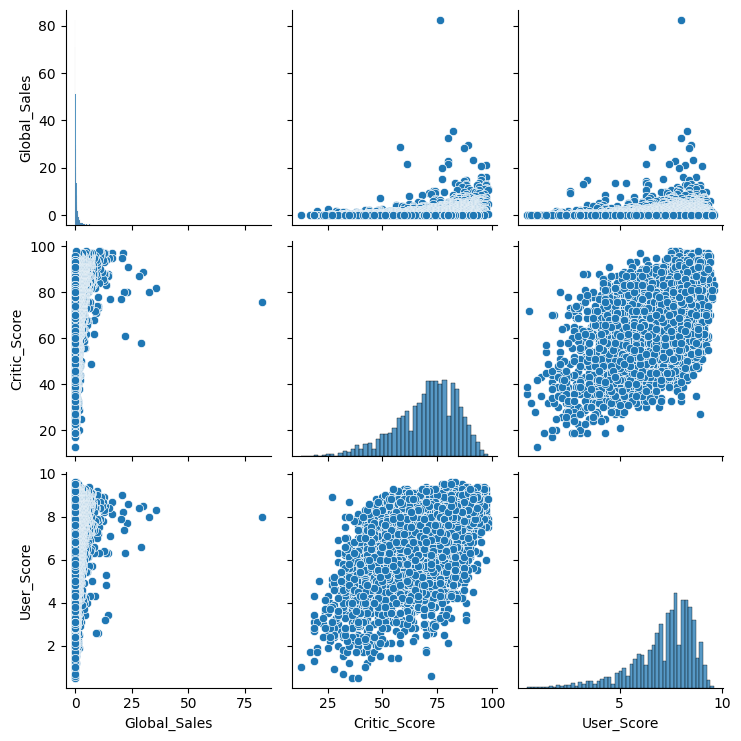

In [42]:
sns_plot = sns.pairplot(
    df[['Global_Sales', 'Critic_Score', 'User_Score']])
sns_plot

Также с помощью `seaborn` можно построить распределение, для примера посмотрим на **распределение оценок критиков `Critic_Score`**. Для этого построим __`distplot`__. По default'у на графике отображается гистограмма и [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

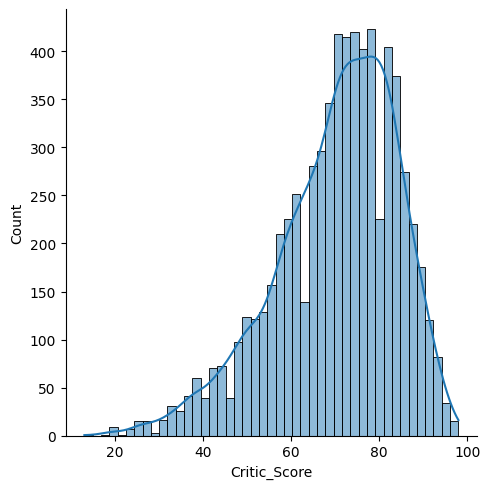

In [50]:
sns.displot(df.Critic_Score, kde=True)

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и __`joint_plot`__ – это гибрид `scatter plot` и `histogram` (отображаются также гистограммы распределений признаков). Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

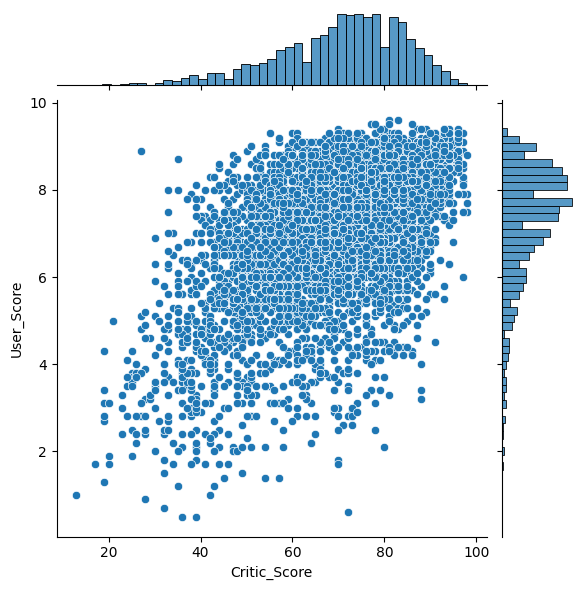

In [51]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter')

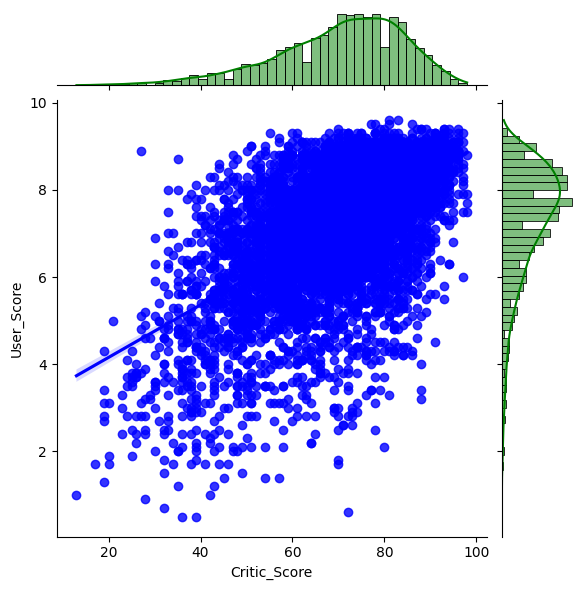

In [84]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='reg', color='red',joint_kws={'color':'blue'},marginal_kws={'color':'green' })

# !!!!!!!

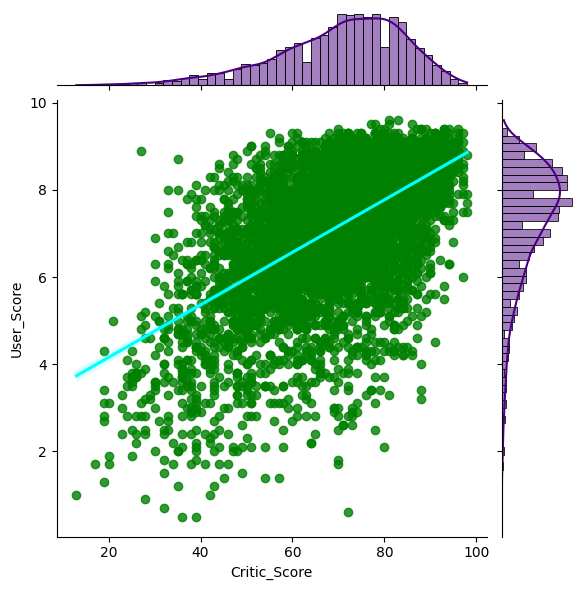

In [101]:
g = sns.jointplot(x='Critic_Score', y='User_Score',data=df,  kind='reg', 
                 joint_kws={'color':'green','line_kws':{'color':'cyan'}},
                 marginal_kws={'color':'indigo' })

In [70]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Давайте **сравним пользовательские оценки игр для топ-5 крупнейших игровых платформ** при помощи `boxplot`.

In [103]:
df.Platform.value_counts().head(5)

Platform
PS2     1140
X360     858
PS3      769
PC       651
XB       565
Name: count, dtype: int64

In [104]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
top_platforms

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

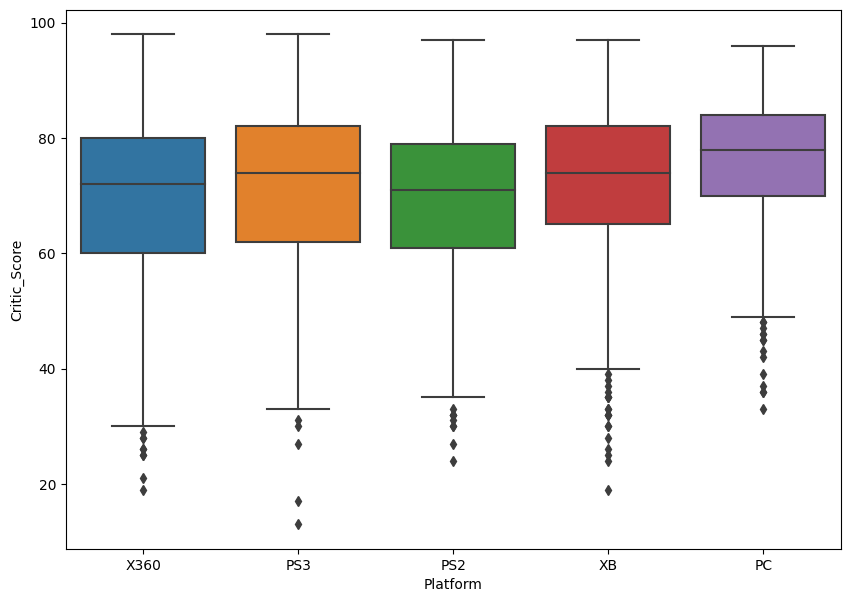

In [105]:
ax = sns.boxplot(x="Platform", y="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)])


И еще один тип графиков (последний из тех, которые мы рассмотрим в этой части) - это __`heat map`__. `Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [106]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


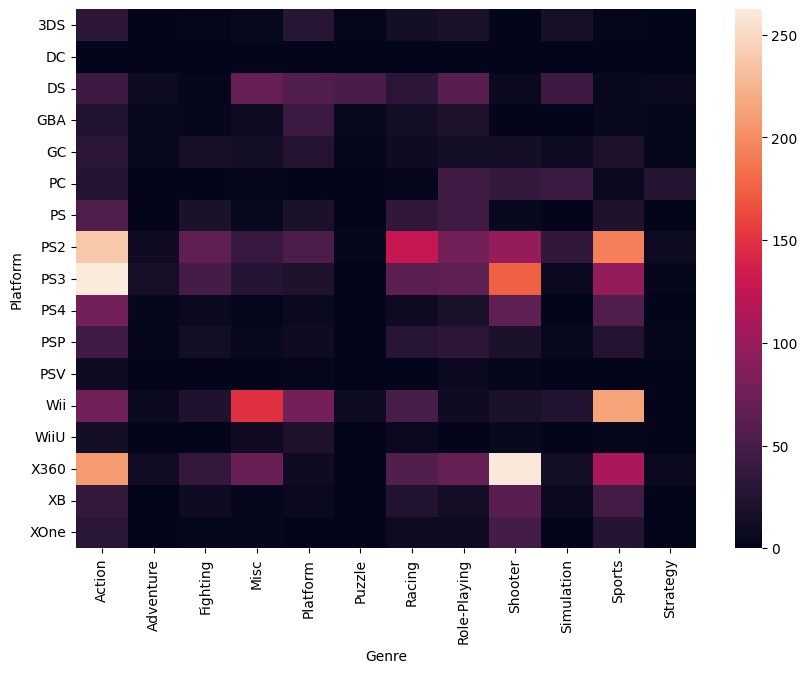

In [107]:
ax = sns.heatmap(platform_genre_sales)

### Полезные ссылки
* [Tutorial](https://seaborn.pydata.org/tutorial.html)
* [Gallery](https://seaborn.pydata.org/examples/index.html)

## <center>Часть 3. Plotly

Мы рассмотрели визуализации на базе библиотеки `matplotlib`. Однако, это не единственная опция для построения графиков на языке `python`. Познакомимся также с библиотекой __`plotly`__. `Plotly` - это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код. 

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем `plotly` с помощью команды `init_notebook_mode`.

In [108]:
!pip3 install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 46.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [109]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим __`line plot` с динамикой числа вышедших игр и их продаж по годам__. 

In [110]:
global_sales_years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum()
global_sales_years_df.head()

,Global_Sales
Year_of_Release,
1985,0.03
1988,0.03
1992,0.03
1994,1.27
1996,20.10


Кол-во вышедших игр

In [121]:
released_years_df = df.groupby('Year_of_Release')[['Name']].count()
released_years_df.head()

,Name
Year_of_Release,
1985,1
1988,1
1992,1
1994,1
1996,7


In [123]:
years_df = global_sales_years_df.join(released_years_df)
years_df.head()

,Global_Sales,Name
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7


In [124]:
years_df.columns = ['Global_Sales', 'Number_of_Games']
years_df.head()

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7


In [126]:
years_df.reset_index().head()

,Year_of_Release,Global_Sales,Number_of_Games
0,1985,0.03,1
1,1988,0.03,1
2,1992,0.03,1
3,1994,1.27,1
4,1996,20.10,7


В `plotly` все строится на объекте `Figure`, который состоит из данных (массив линий, которые в библиотеке называются `traces`) и оформления/стиля, за который отвечает объект `layout`. В простых случаях можно вызывать функцию `iplot` и просто от массива `traces`.

In [127]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)
  
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

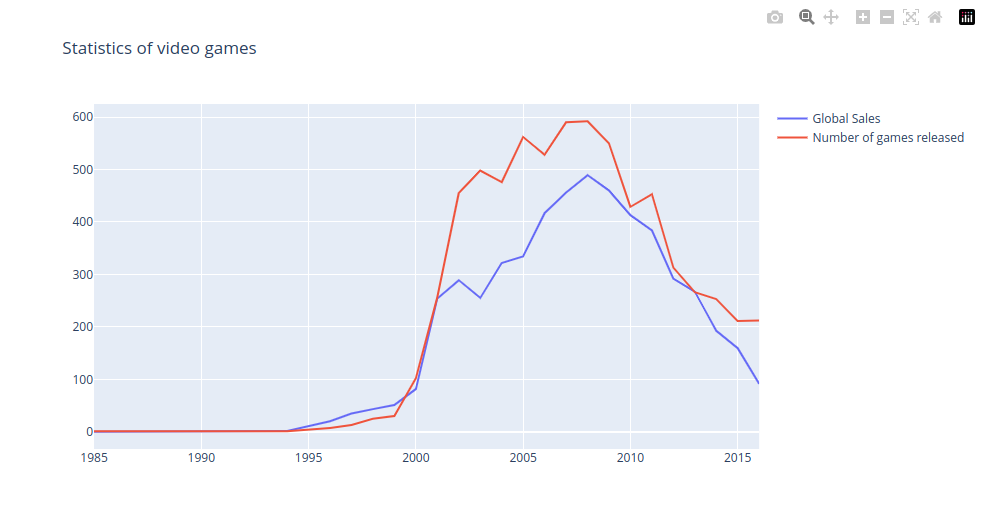

Посмотрим также на __рыночную долю игровых платформ, расчитанную по количеству выпущенных игр и по суммарной выручке__. Для этого построим __`bar chart`__.

In [128]:
global_sales_platforms_df = df.groupby('Platform')[['Global_Sales']].sum()
released_platforms_df = df.groupby('Platform')[['Name']].count()
platforms_df = global_sales_platforms_df.join(released_platforms_df)
platforms_df

,Global_Sales,Name
Platform,,
3DS,123.23,155
DC,4.55,14
DS,382.33,464
GBA,131.75,237
GC,159.42,348
PC,187.12,651
PS,206.55,150
PS2,945.97,1140
PS3,784.30,769


В процентах

In [129]:
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', inplace=True)
platforms_df = platforms_df.apply(lambda x: 100*x/platforms_df.sum(), axis = 1)
platforms_df.head()

,Global_Sales,Number_of_Games
Platform,,
DC,0.085735,0.205128
PSV,0.581868,1.728938
WiiU,1.245136,1.304029
3DS,2.322006,2.271062
XOne,2.441469,2.329670


In [130]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales',
    orientation = 'v'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

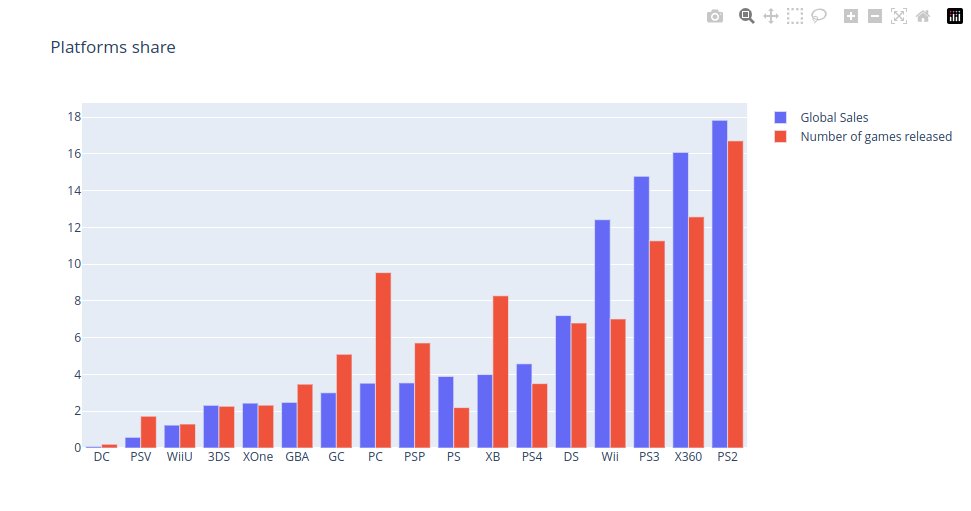

В `plotly` можно построить и __`box plot`__. Рассмотрим __различия оценок критиков в зависимости от жанра игры__.

In [131]:
df.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [132]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, 
               name=genre)
    )
iplot(data, show_link = False)

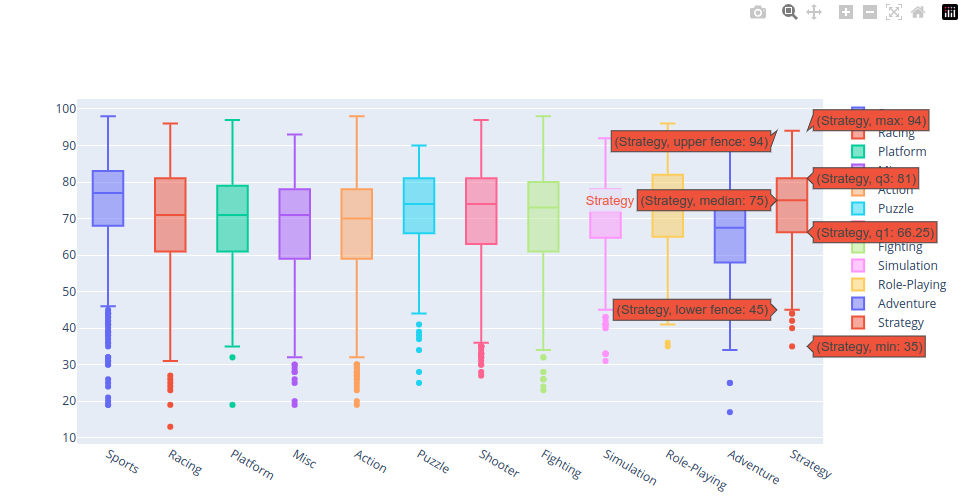

Давайте посмотрим на график зависимости средней оценки пользователей и оценки критиков по жанрам. Это будет обычный scatter plot.

In [133]:
scores_genres_df = df.groupby('Genre')[['Critic_Score', 'User_Score']].mean()
sales_genres_df = df.groupby('Genre')[['Global_Sales']].sum()

genres_df = scores_genres_df.join(sales_genres_df)
    
genres_df.head()

,Critic_Score,User_Score,Global_Sales
Genre,,,
Action,67.828834,7.095828,1203.16
Adventure,66.133065,7.160887,80.75
Fighting,69.732804,7.301852,249.95
Misc,67.460938,6.849740,416.26
Platform,70.000000,7.377171,377.80


In [134]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres', 'yaxis': {'title': 'user score'}, 
          'xaxis': {'title': 'critic score'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

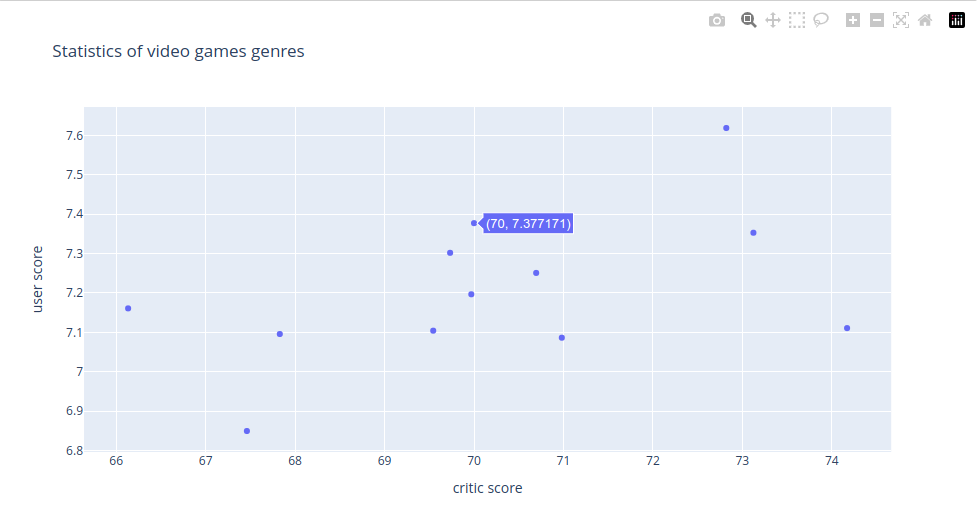

Пока что ничего непонятно, давайте добавим к точкам подписи.

In [135]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Statistics of video games genres'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

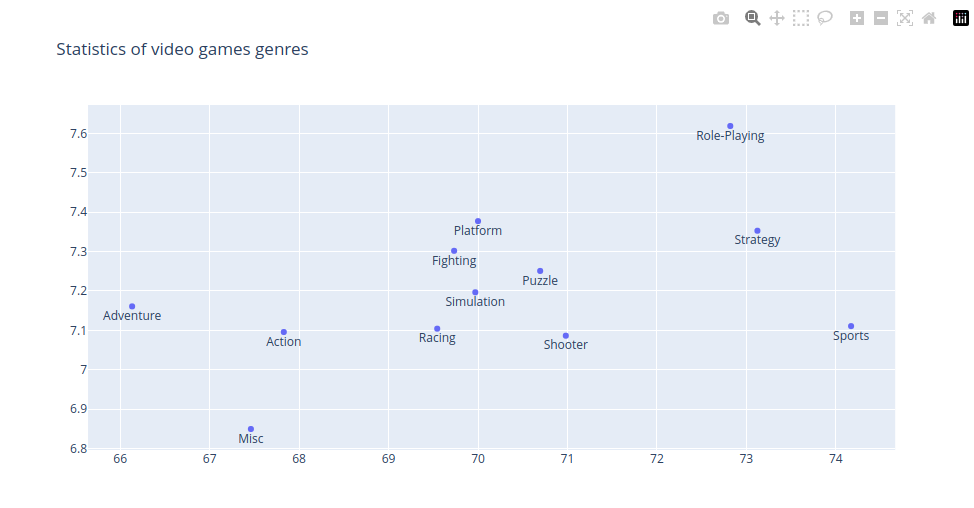

Далее добавим на график еще одно измерение - размер жанра (суммарный объем продаж, который мы заранее посчитали) и получим bubble chart.

In [136]:
genres_df.index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [137]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    textposition='bottom center',
    marker = dict(
        size = 1/10*genres_df.Global_Sales,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of video games genres',
    'xaxis': {'title': 'Critic Score'},
    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

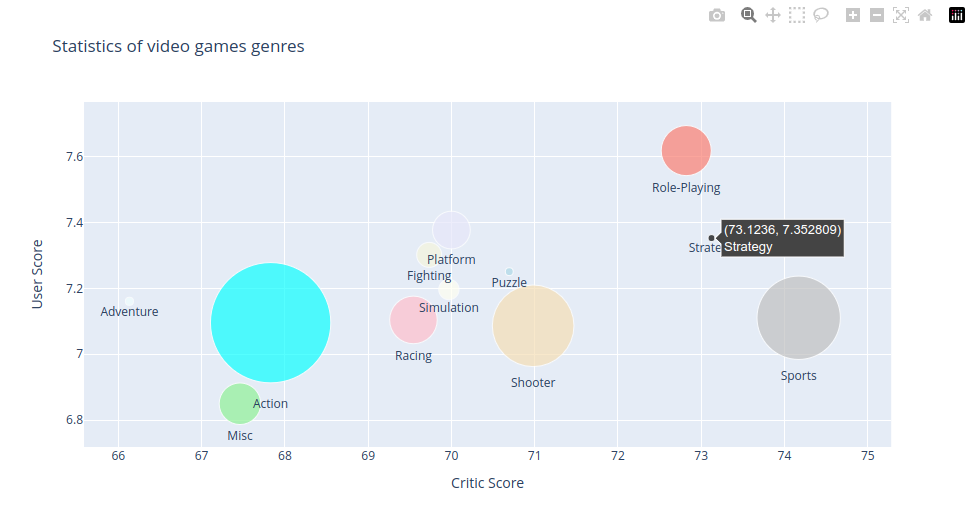

В plotly есть возможность делать графики в drop down menus, когда в зависимости от выбранного среза будут отображаться различные графики. Давайте построим __гистораммы распределений оценок пользователей по жанрам__.

In [138]:
traces = []
for genre in ['Racing', 'Shooter', 'Sports', 'Action']:
    traces.append(
        go.Histogram(
            x=df[df.Genre == genre].User_Score,
            histnorm='probability', 
            name = genre, 
            visible = (genre == 'Racing'))
    )
    
layout = go.Layout(
    title='User Score Distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='Racing',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='Shooter',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='Sports',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='Action',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

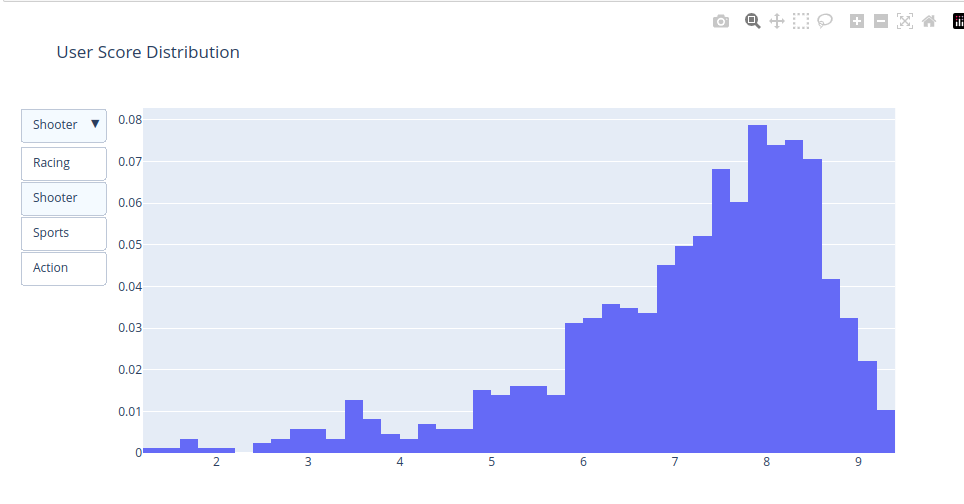

Немного отвлечемся от данных об играх и рассмотрим еще один тип графика, который можно построить в plotly и они могут быть очень полезны, например, для web-аналитики - это __воронка или funnel пользователя на сайте__.
В plotly на данный момент нет функции, которая умеет строить воронки из коробки, но с помощью svg фигур ее достаточно легко построить. Этот пример покажет нам, насколько легко можно кастомизировать библиотеку под свои нужды.

In [139]:
# chart stages data
values = [40000, 17567, 7443, 3290, 2567]
phases = ['Main Page', 'Catalog', 'Product Details', 'Cart', 'Purchase']
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

In [140]:
n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)

In [141]:
# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(40,40,40)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(0,0,0)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False,
        range=[-450, 450]
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False,
        showgrid=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

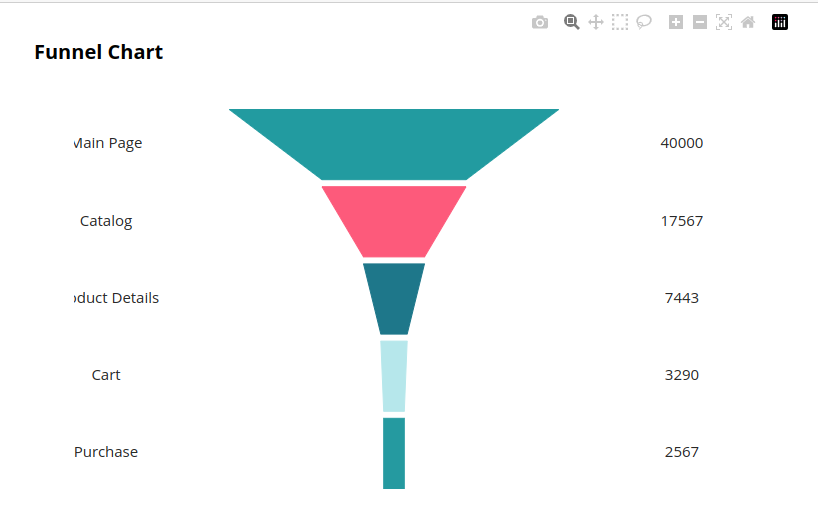

### Обертки для plotly
Как вы могли заметить, описывать все traces бывает достаточно многословно. Поэтому для частых cases удобно написать функции-обертки на DataFrame. Рассмотрим сценарии с line plot и несколько line plots с drop down.

In [142]:
def plotly_line_plot(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

df1.head()

In [143]:
plotly_line_plot(
    df1,
    title = 'Sales of Video Games'
)

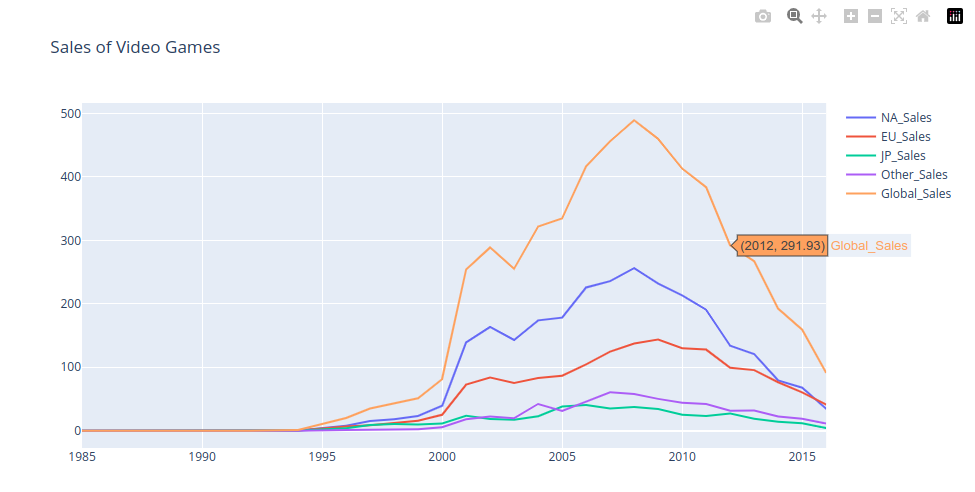

In [144]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Scatter(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    iplot(fig, show_link=False)

In [147]:
genre_slices = {}
for genre in df.Genre.unique():
    genre_slices[genre] = df[df.Genre == genre]\
        .groupby('Year_of_Release')[list(filter(lambda x: 'Sales' in x, df.columns))].sum()

In [148]:
genre_slices.keys()

dict_keys(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle', 'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Strategy'])

In [149]:
genre_slices['Action'].head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1996,5.30,3.20,1.24,0.97,10.71
1997,0.95,0.64,0.27,0.13,1.99
1998,6.19,5.37,2.80,0.91,15.27
1999,4.66,3.85,0.32,0.53,9.38
2000,6.81,5.58,2.08,0.94,15.40


In [150]:
plotly_dropdown_line_plots(genre_slices, title = 'Sales of Video Games by genre')

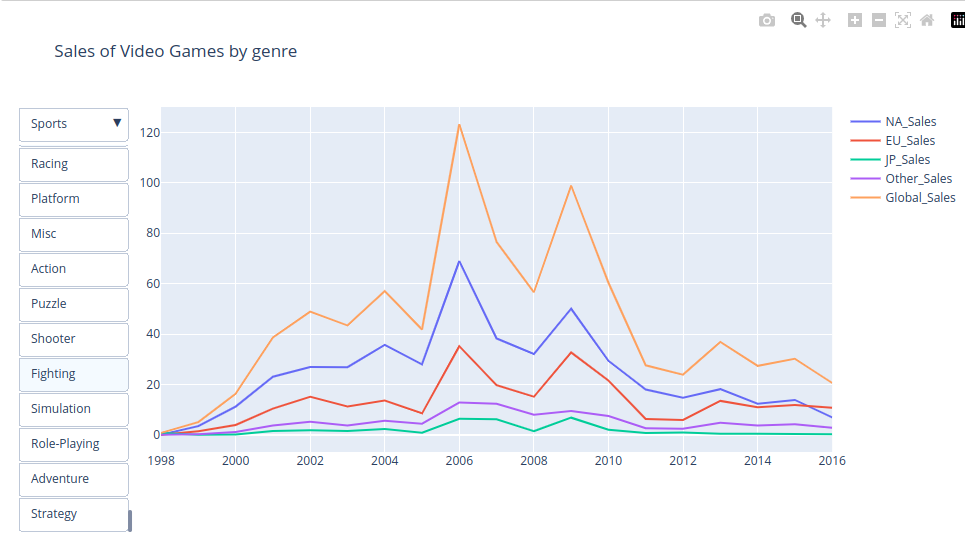

### Полезные ссылки
* [Галерея](https://plot.ly/python/)
* [Документация](https://plot.ly/python/reference/)

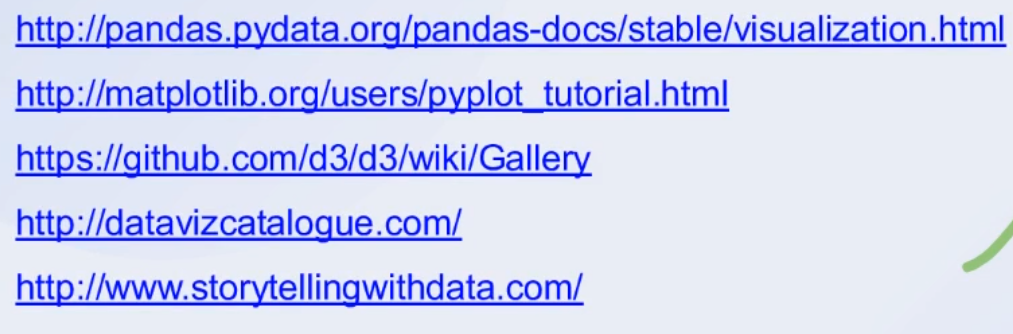

### Homework

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [2]:
crime = pd.read_csv('../.datasets/16./Crime_Data_from_2020_to_Present.csv')
crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748566,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,15,N Hollywood,1548,2,662,"BUNCO, GRAND THEFT",...,IC,Invest Cont,662.0,NaN,NaN,NaN,5300 DENNY AV,NaN,34.1667,-118.3643
748567,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
748568,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
748569,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748571 entries, 0 to 748570
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           748571 non-null  int64  
 1   Date Rptd       748571 non-null  object 
 2   DATE OCC        748571 non-null  object 
 3   TIME OCC        748571 non-null  int64  
 4   AREA            748571 non-null  int64  
 5   AREA NAME       748571 non-null  object 
 6   Rpt Dist No     748571 non-null  int64  
 7   Part 1-2        748571 non-null  int64  
 8   Crm Cd          748571 non-null  int64  
 9   Crm Cd Desc     748571 non-null  object 
 10  Mocodes         645904 non-null  object 
 11  Vict Age        748571 non-null  int64  
 12  Vict Sex        650866 non-null  object 
 13  Vict Descent    650860 non-null  object 
 14  Premis Cd       748562 non-null  float64
 15  Premis Desc     748141 non-null  object 
 16  Weapon Used Cd  259881 non-null  float64
 17  Weapon Des

In [10]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

* DR_NO : Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
* Date Rptd : MM/DD/YYYY
* DATE OCC : MM/DD/YYYY
* TIME OCC : In 24 hour military time.
* AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
* AREA NAME : The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
* Rpt Dist No : A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4
* Part 1-2
* Crm Cd : Indicates the crime committed. (Same as Crime Code 1)
* Crm Cd Desc : Defines the Crime Code provided.
* Mocodes : Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order. https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf
* Vict Age : Two character numeric
* Vict Sex : F - Female M - Male X - Unknown
* Vict Descent : Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
* Premis Cd : The type of structure, vehicle, or location where the crime took place.
* Premis Desc : Defines the Premise Code provided.
* Weapon Used Cd : The type of weapon used in the crime.
* Weapon Desc : Defines the Weapon Used Code provided.
* Status : Status of the case. (IC is the default)
* Status Desc : Defines the Status Code provided.
* Crm Cd 1 : Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
* Crm Cd 2 : May contain a code for an additional crime, less serious than Crime Code 1.
* Crm Cd 3 : May contain a code for an additional crime, less serious than Crime Code 1.
* Crm Cd 4 : May contain a code for an additional crime, less serious than Crime Code 1.
* LOCATION : Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
* Cross Street : Cross Street of rounded Address
* LAT : Latitude
* LON : Longtitude

## **About the Dataset**

The dataset that will be presented in the next lines is available on the [Los Angeles Open Data](https://data.lacity.org), for this purpose, I've used the dataset ["Crime Data from 2020 to Present"](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8), which covers crime incidents in Los Angeles between the years of 2020 and 2021. The original file has 28 columns and 220405 rows. The file has been pre-processed in [Jupyter Notebook](https://jupyter.org/), to remove some rows values and columns that will be not used in the analysis.

Below are all the variables in the dataset, followed by its description:

* `DR_NO` - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.
* `DATE OCC` - Date of crime occurrence(YYYY-MM-DD)
* `AREA` - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
* `AREA NAME` - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.
* `Rpt Dist No` - Code that represents a sub-area within a Geographic Area.
* `Crm Cd` - Indicates the crime committed.
* `Crm Cd Desc` - Defines the Crime Code provided.
* `Vict Age` - Indicates the age of the victim.
* `Vict Sex` - F: Female M: Male X: Unknown
* `Vict Descent` - Descent Code: **A** - Other Asian **B** - Black **C** - Chinese **D** - Cambodian **F** - Filipino **G** - Guamanian **H** - Hispanic/Latin/Mexican **I** - American Indian/Alaskan Native **J** - Japanese **K** - Korean **L** - Laotian **O** - Other **P** - Pacific Islander **S** - Samoan **U** - Hawaiian **V** - Vietnamese **W** - White **X** - Unknown **Z** - Asian Indian
* `Premis Cd` - The type of structure, vehicle, or location where the crime took place.
* `Premis Desc` - Defines the Premise Code provided.
* `Weapon Used Cd` - The type of weapon used in the crime. 
* `Weapon Desc` - Defines the Weapon Used Code provided.
* `LOCATION` - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
* `LAT` - Latitude Coordinate
* `LON` - Longitude Coordinate

In [15]:
crime.LOCATION[3]

'5400    CORTEEN                      PL'

In [17]:
crime['Vict Age'].value_counts()

Vict Age
 0      182559
 30      17211
 35      16818
 31      16424
 29      16395
         ...  
 97         57
 98         56
-1          46
-2          11
 120         1
Name: count, Length: 102, dtype: int64

Взглянем на boxplot и посмотрим есть ли какие-либо выбросы в данных

<Axes: ylabel='Vict Age'>

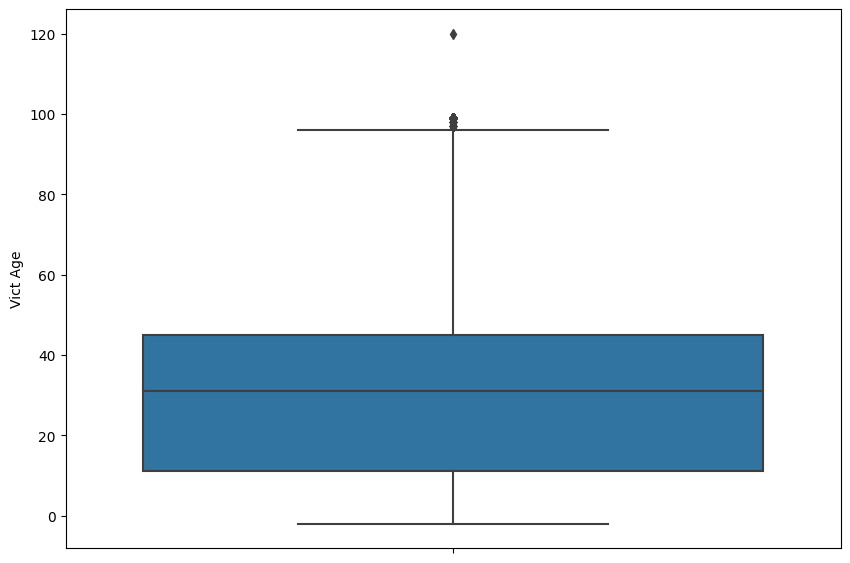

In [31]:
sns.boxplot(y=crime['Vict Age'])

Взглянем на гистограмму

<Axes: >

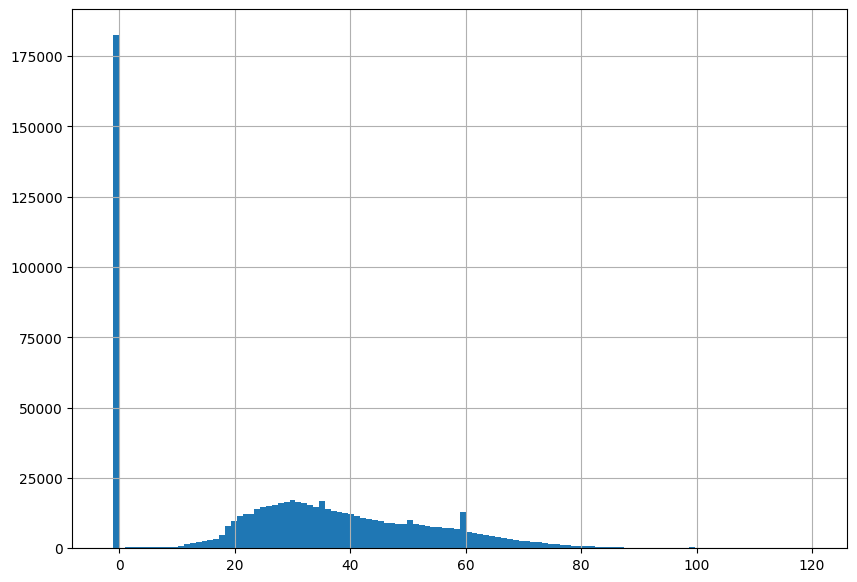

In [33]:
crime['Vict Age'].hist(bins=120)

У нас явно есть выбросы, как например 120 летний возраст, значения 0 появились из-за того, что возраст неизвестен

In [49]:
crime['Vict Age'].value_counts().sort_index()

Vict Age
-2          11
-1          46
 0      182559
 2         328
 3         388
         ...  
 96         73
 97         57
 98         56
 99        277
 120         1
Name: count, Length: 102, dtype: int64

Выбросим все нулевые значения

In [59]:
cr = crime.loc[crime['Vict Age'] != 0]

<Axes: >

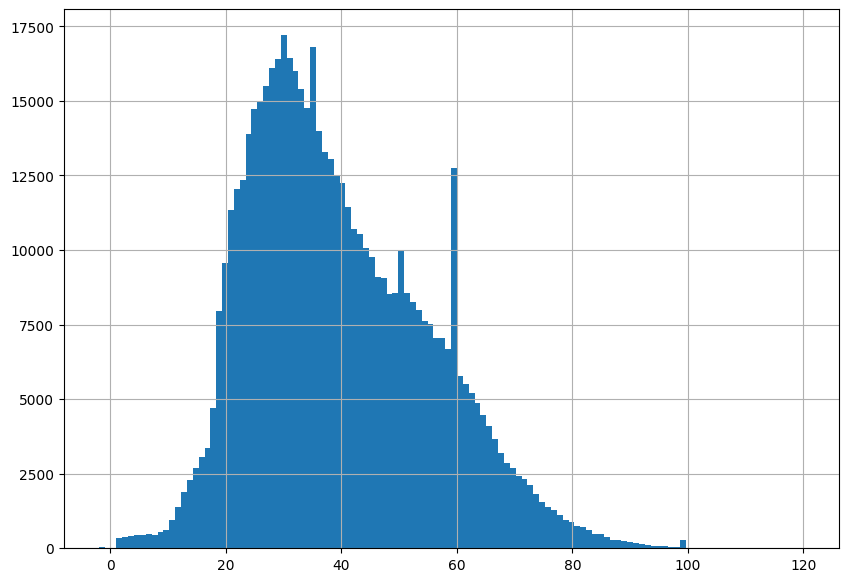

In [60]:
cr['Vict Age'].hist(bins=120)

In [61]:
cr = crime.loc[crime['Vict Age'] >= 1]

<Axes: >

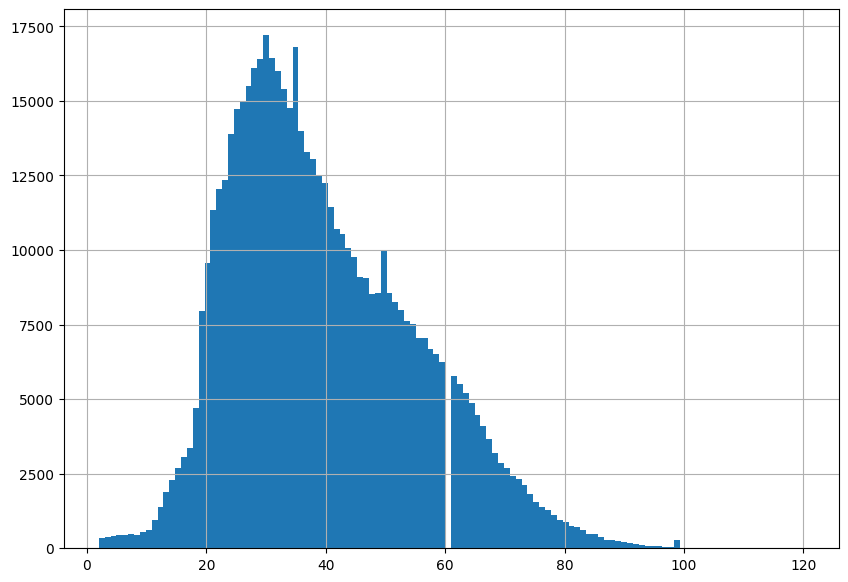

In [62]:
cr['Vict Age'].hist(bins=120)

<Axes: ylabel='Vict Age'>

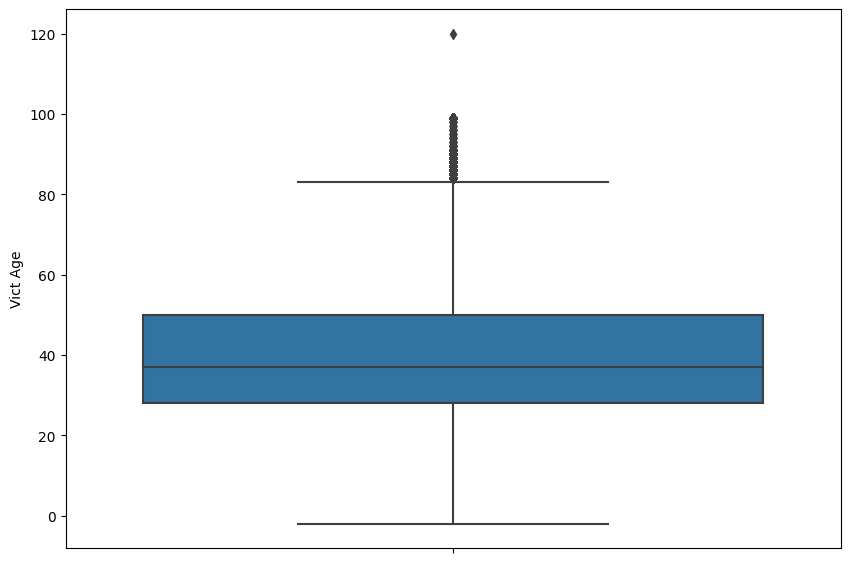

In [41]:
sns.boxplot(y=cr['Vict Age'])

In [42]:
len(cr['Vict Age'])

566012

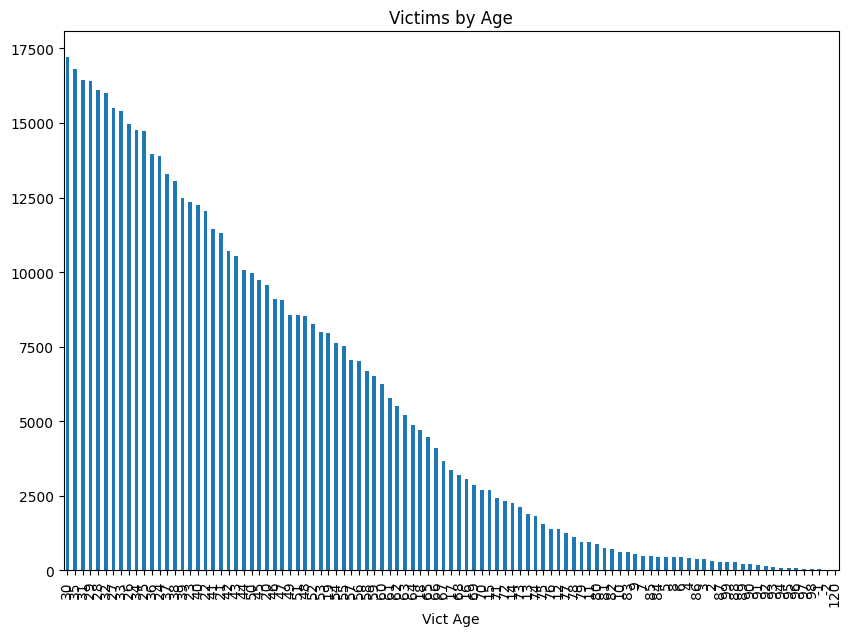

In [46]:
cr['Vict Age'].value_counts().plot(kind='bar',title="Victims by Age");

In [53]:
cr['Vict Age'].value_counts() 

Vict Age
 30     17211
 35     16818
 31     16424
 29     16395
 28     16097
        ...  
 97        57
 98        56
-1         46
-2         11
 120        1
Name: count, Length: 101, dtype: int64

<Axes: title={'center': 'Victims by Age'}, xlabel='Vict Age'>

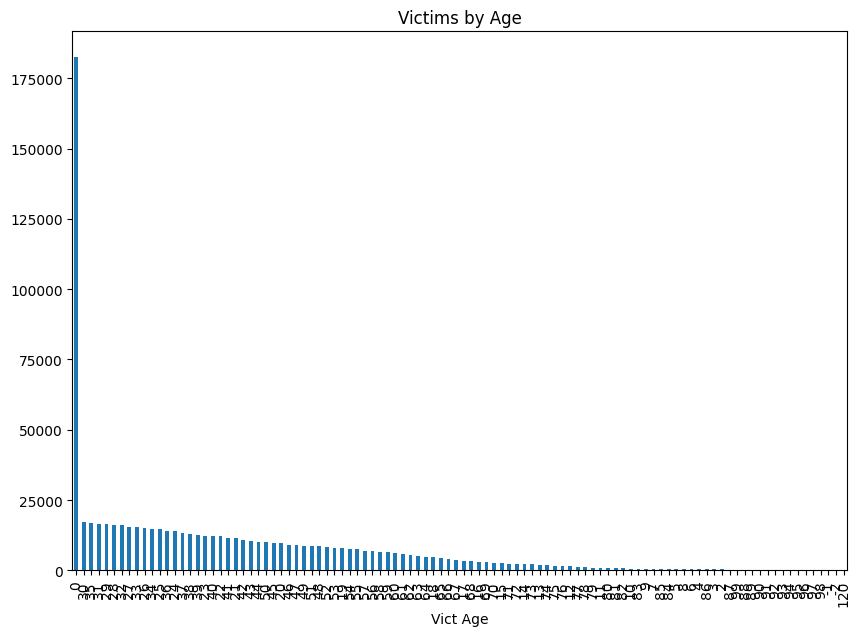

In [18]:
crime['Vict Age'].value_counts().plot(kind='bar',title="Victims by Age")